In [77]:
!pip install librosa


In [78]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


In [79]:
import pandas as pd

download_path = '../vocal_patterns/data'
metadata_file = f"{download_path}/dataset_tags.csv"

df = pd.read_csv(metadata_file)
df.head()


path exercise technique  \
0  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
1  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
2  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
3  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other  straight   
4  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other  straight   

               filename  
0    m6_row_vibrato.wav  
1   m6_caro_vibrato.wav  
2   m6_dona_vibrato.wav  
3  m6_caro_straight.wav  
4   m6_row_straight.wav

In [80]:
df["path"][1]


'/Users/elsagregoire/code/ElsaGregoire/vocal_patterns/vocal_patterns/data/other/excerpts m6/vibrato/m6_caro_vibrato.wav'

In [81]:
audio_path = '/Users/elsagregoire/Desktop/Vocal Set Le Wagon/arpeggios/arpeggios f1/slow_forte/f1_arpeggios_c_slow_forte_a.wav'


In [82]:
y1, sr = librosa.load(df["path"][1])


### Load the audio file

In [83]:
y, sr = librosa.load(audio_path)


In [84]:
y #y is the data as numpy array
# which gives us the amplitude of the wave form at a certain moment


array([1.3526442e-04, 1.4985875e-04, 9.8155477e-05, ..., 4.6974109e-04,
       4.5185169e-04, 4.9337966e-04], dtype=float32)

In [85]:
y.shape  # 165853 / 22050 = 7,52 seconds long


(165853,)

In [86]:
y[3]


8.9653826e-05

In [87]:
sr # sr is the smpling rate


22050

In [88]:
Audio(data=y, rate=sr)


### Waveplot

### truncating the wav file 

In [89]:
start_sample = int(0.0 * sr)
end_sample = int(6.0 * sr)
truncated_signal = y[start_sample:end_sample]
len(truncated_signal)


132300

In [90]:
Audio(data=truncated_signal, rate=sr)


### Padding if too long (here tryout with 10 sec)

In [91]:
current_length = len(y)
current_length


165853

In [92]:
padding_both_sides = int((10.0 * sr - current_length) / 2)
padding_both_sides


27323

In [93]:
padded_signal = librosa.util.pad_center(y, size= (current_length + padding_both_sides * 2))
padded_signal


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [94]:
len(padded_signal)


220499

### Pitch shift

In [95]:
steps = float(3)
y_pitched_up=librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)
Audio(data=y_pitched_up, rate=sr)


In [96]:
y_pitched_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-2)
Audio(data=y_pitched_down, rate=sr)


### Time stretch

In [97]:
faster_rate = 1.5
y_stretched_faster = librosa.effects.time_stretch(y, rate=faster_rate)
Audio(data=y_stretched_faster, rate=sr)


In [98]:
slower_rate = 0.5
y_stretched_slower = librosa.effects.time_stretch(y, rate=slower_rate)
Audio(data=y_stretched_slower, rate=sr)


### Add noise

In [99]:
noise_level = 0.005
np.random.normal(size=len(y))


array([ 0.71056405, -0.47053967, -0.50991596, ...,  1.48728762,
        1.1918862 ,  1.81599408])

In [100]:
y_noisy = y + (noise_level * np.random.normal(size=len(y)))
Audio(data=y_noisy, rate=sr)


### mel spectrogram

In [101]:
# # Generate a spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=padded_signal, sr=sr)

# convert to decibels, logscale
# 2D NumPy array containing the intensity values at different frequencies and time points.
power_to_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# 128 frequency bins (vertical axis) and 431 time frames (horizontal axis).
# power_to_db represents as a grayscale image, not a color image!
# Each element in the matrix represents the intensity or magnitude of the signal at a specific frequency and time.
power_to_db.shape


(128, 431)

In [102]:
power_to_db


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [103]:
min_value = np.min(power_to_db)
max_value = np.max(power_to_db)
print(max_value)
print(min_value)


0.0
-80.0


In [104]:
normalized_spectrogram = (power_to_db - min_value) / (max_value - min_value)
normalized_spectrogram


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

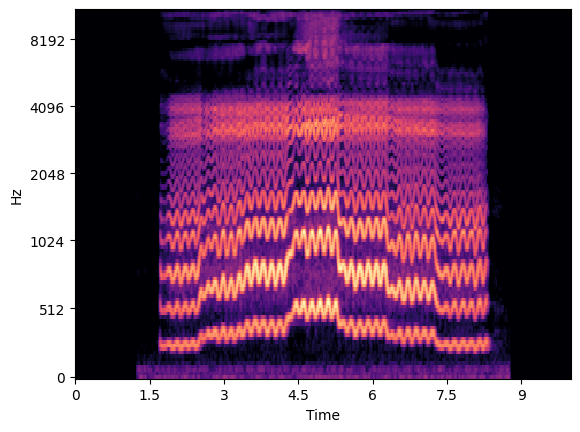

In [105]:
# display spectrogram
spectrogram_db = librosa.display.specshow(power_to_db, y_axis='mel', x_axis='time')


### FREQUENCY MASKING WITH NEW SPEC!

In [106]:
# this is the NEW original spectrogram I'm checking out for FREQUENCY masking
new_power_to_db = librosa.amplitude_to_db(np.abs(librosa.stft(padded_signal)), ref=np.max)
new_power_to_db


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [107]:
# this is the old version of the original spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=padded_signal, sr=sr)
power_to_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
power_to_db


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

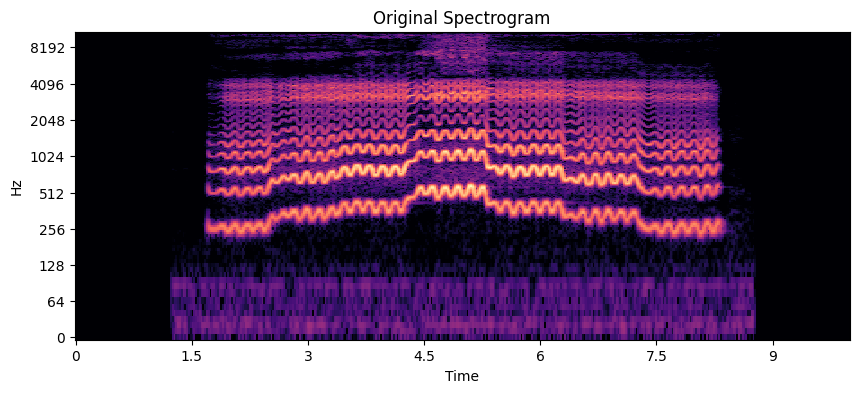

In [108]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(new_power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Original Spectrogram')
plt.show()


In [109]:
# The frequency masks
num_masks = 1
max_mask_width = 30

for i in range(num_masks):
    # Randomly choose the center frequency for the mask
    center_freq = np.random.randint(low=0, high=new_power_to_db.shape[0])
    # np.random.randint takes a random integer
    # between low=0 and high=the first int in the shape of the spectogram

    # Randomly choose the width of the mask
    mask_width = np.random.randint(1, max_mask_width)
    # random int between 1 and 10

    # Apply the frequency mask
    # Choose the frequency range to apply the mask
    start_freq = center_freq - mask_width // 2
    end_freq = center_freq + mask_width // 2

    # Apply the frequency mask by setting the selected range to 0.0
    new_power_to_db[start_freq:end_freq] = 0.0


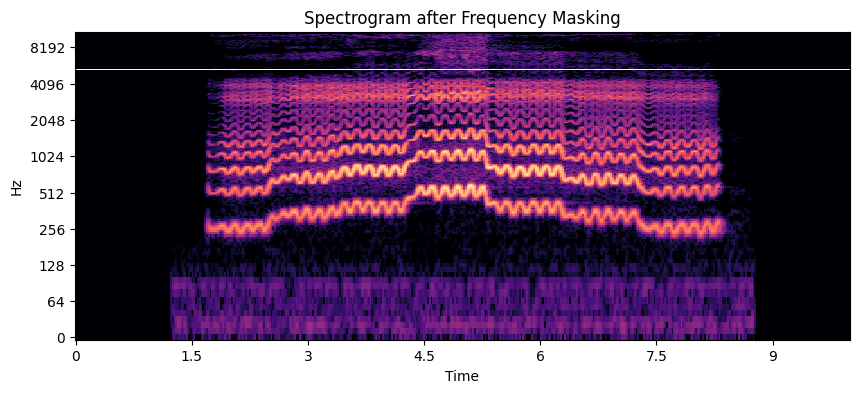

In [110]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(new_power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram after Frequency Masking')

plt.show()


### FREQUENCY MQSKING OLD SPECTRO!

In [111]:
# The frequency masks
num_masks = 1
max_mask_width = 10

for i in range(num_masks):
    # Randomly choose the center frequency for the mask
    center_freq = np.random.randint(low=0, high=power_to_db.shape[0])
    # np.random.randint takes a random integer
    # between low=0 and high=the first int in the shape of the spectogram

    # Randomly choose the width of the mask
    mask_width = np.random.randint(1, max_mask_width)
    # random int between 1 and 10

    # Apply the frequency mask
    # Choose the frequency range to apply the mask
    start_freq = center_freq - mask_width // 2
    end_freq = center_freq + mask_width // 2

    # Apply the frequency mask by setting the selected range to 0.0
    power_to_db[start_freq:end_freq] = 0.0


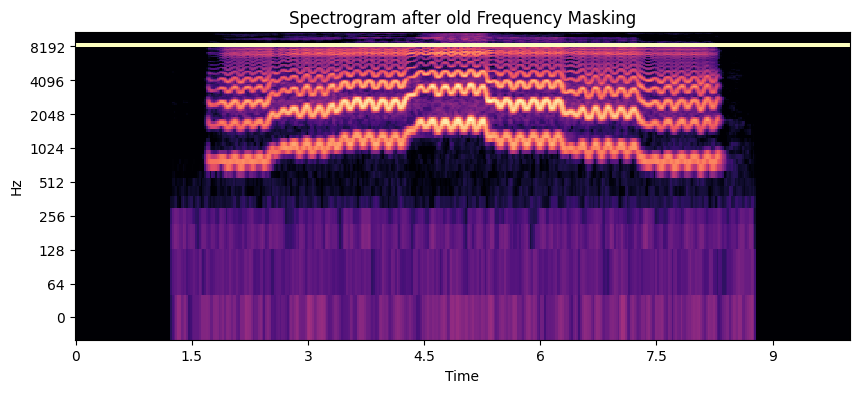

In [112]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram after old Frequency Masking')

plt.show()


### TIME MASKING OLD SPEC!

In [113]:
num_masks = 1
max_mask_width = 10


In [114]:
# This is the same as in frequency masking but we,re taking the vertical axis

for _ in range(num_masks):
    # Randomly choose the center time step for the mask
    center_time = np.random.randint(low=0, high=power_to_db.shape[1])

    # Randomly choose the width of the time mask
    mask_width = np.random.randint(1, max_mask_width)

    # Apply the time mask
    start_time = center_time - mask_width // 2 #47
    end_time = center_time + mask_width // 2   #53

    power_to_db[start_time:end_time] = 0.0
    #this takes a snippet between [47:53] and sets it to 0.0


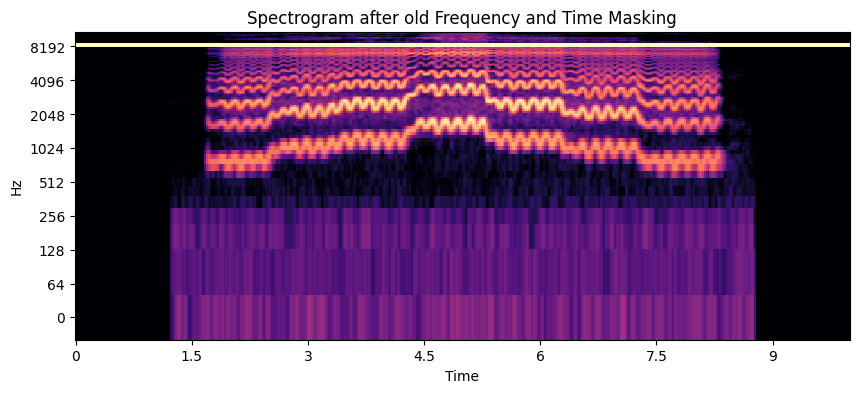

In [115]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram after old Frequency and Time Masking')

plt.show()


# New Tryout 

## Loading File

In [116]:
y1, sr = librosa.load(df["path"][1056])
Audio(data=y1, rate=sr)


## Slowing down if < 4 sec

## Slicing at regular interval 4 sec snippets

In [118]:
# def slice_wav(input_file, output_folder, snippet_duration=4, overlap=1):
#     # Load the audio file
#     y, sr = librosa.load(input_file, sr=None)

#     # Calculate the frame size and hop length
#     frame_size = int(snippet_duration * sr)
#     hop_length = int((snippet_duration - overlap) * sr)

#     # Get the total number of snippets
#     num_snippets = int(np.floor((len(y) - frame_size) / hop_length)) + 1

#     # Slice the audio into snippets
#     for i in range(num_snippets):
#         start_sample = i * hop_length
#         end_sample = start_sample + frame_size
#         snippet = y[start_sample:end_sample]

#         # Save each snippet to a new file
#         output_file = f"{output_folder}/snippet_{i + 1}.wav"
#         librosa.output.write_wav(output_file, snippet, sr)

# # Example usage
# input_file = "path/to/your/input/file.wav"
# output_folder = "path/to/your/output/folder"
# slice_wav(input_file, output_folder)


In [ ]:
snippet_duration = 4
overlap = 3 # this is the number of overlapping seconds


In [ ]:
# Calculate the frame size and hop length
frame_size = int(snippet_duration * sr)
hop_length_sr = int((snippet_duration - overlap) * sr)
# Get the total number of snippets
num_snippets = int(np.floor((len(y1) - frame_size) / hop_length_sr)) + 1


In [ ]:
print(frame_size)
print(hop_length_sr)
print(num_snippets)


88200
22050
8


In [119]:
# for i in range(num_snippets):
#         start_sample = i * hop_length_sr
#         end_sample = start_sample + frame_size
#         snippet = y[start_sample:end_sample]
#         print(snippet)


In [122]:
start_sample = i * hop_length_sr
end_sample = start_sample + frame_size
snippet = y1[start_sample:end_sample]
print(snippet)


[-0.00028865 -0.00042862 -0.00036281 ...  0.03596216  0.02701356
  0.02248944]


In [125]:
snippet.shape


(88200,)

In [124]:

Audio(data=snippet, rate=sr)


In [149]:
df_small = df.head()
df_small


path exercise technique  \
0  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
1  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
2  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
3  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other  straight   
4  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other  straight   

               filename  
0    m6_row_vibrato.wav  
1   m6_caro_vibrato.wav  
2   m6_dona_vibrato.wav  
3  m6_caro_straight.wav  
4   m6_row_straight.wav

In [152]:
df_small[1:2]


path exercise technique  \
1  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   

              filename  
1  m6_caro_vibrato.wav

In [127]:
def slice_4(waveform, sr, snippet_duration=4, overlap=3):
    # Calculate the frame size and hop length
    frame_size = int(snippet_duration * sr)
    hop_length = int((snippet_duration - overlap) * sr)

    # Get the total number of snippets
    num_snippets = int(np.floor((len(waveform) - frame_size) / hop_length)) + 1

    new_4sec_arrays = []
    # Slice the audio into snippets
    for i in range(num_snippets):
        start_sample = i * hop_length
        end_sample = start_sample + frame_size
        snippet = waveform[start_sample:end_sample]
        # Append the snippet to the list
        new_4sec_arrays.append(snippet)

    return new_4sec_arrays


In [153]:
# def data_augm(input_df):
#     # Function to load and augment audio files
#     def load_and_augment(row):
#         audio_path = row["path"]
#         exercise = row["exercise"]

#         # Load the audio file
#         waveform, sr = librosa.load(audio_path)

#         # Perform data augmentation, e.g., change pitch, speed, add noise, etc.
#         # augmented_waveform = your_augmentation_function(waveform)

#         # Slice the waveform into 4-second snippets
#         snippets = slice_4(waveform, sr)

#         # Create a DataFrame with snippets and exercise labels
#         df = pd.DataFrame({"waveform": snippets, "exercise": [exercise] * len(snippets)})
#         return df

#     # Apply the load_and_augment function to each row of the input DataFrame
#     augmented_data = df.apply(load_and_augment, axis=1)
#     print(type(augmented_data))

#     # Concatenate the resulting DataFrames into a single DataFrame
#     result_df = pd.concat(augmented_data, ignore_index=True)

#     return result_df


In [158]:
def data_augm(input_df):

    def load_and_augment(row):
        audio_path = row["path"]
        exercise = row["exercise"]

        # Load the audio file
        waveform, sr = librosa.load(audio_path, sr=None)

        # Perform data augmentation, e.g., change pitch, speed, add noise, etc.
        # augmented_waveform = your_augmentation_function(waveform)

        # Slice the waveform into 4-second snippets
        snippets = slice_4(waveform, sr)

        # Create a DataFrame with snippets and exercise labels
        df = pd.DataFrame({"waveform": snippets, "exercise": [exercise] * len(snippets)})
        return df

    # Apply the load_and_augment function to the first 5 rows of the input DataFrame
    augmented_data = pd.concat([load_and_augment(row) for _, row in input_df.head(5).iterrows()], ignore_index=True)

    return augmented_data


In [159]:
data_augm(df_small)


waveform exercise
0    [0.00048828125, 0.0005493164, 0.0005493164, 0....    Other
1    [-0.038269043, -0.03894043, -0.039154053, -0.0...    Other
2    [0.03744507, 0.0357666, 0.035003662, 0.0342712...    Other
3    [0.0016784668, 0.00039672852, -0.0005493164, -...    Other
4    [-0.040985107, -0.040863037, -0.04006958, -0.0...    Other
..                                                 ...      ...
112  [0.00048828125, 0.00061035156, 0.0012817383, 0...    Other
113  [0.04244995, 0.047546387, 0.05126953, 0.052947...    Other
114  [0.0076904297, 0.0072631836, 0.007537842, 0.00...    Other
115  [0.007904053, 0.00793457, 0.00793457, 0.007995...    Other
116  [-0.004638672, -0.004058838, -0.0037841797, -0...    Other

[117 rows x 2 columns]